In [1]:
#
# How to use your trained model - Deep Learning basics with Python, TensorFlow and Keras
# Steg 5 - Fyra lagers CNN modell där nod-antalet varierar mellan lagerna
# Använder softmax jämfört tidigare sigmoid

In [2]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
import pickle
import time

import numpy as np
import matplotlib.pyplot as plt


In [3]:
# stepp 4
# Läser in tidigare sparat data från disk 

DATADIR = "C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\"  # path till katalog med djurbilder
DATADIR_MOD = DATADIR                                 # path till sparad modell

TxT_INPmod_fileN = DATADIR_MOD + "X_train.pickle"     # Filnamn indata - träningsdata
TxT_OUTmod_fileN = DATADIR_MOD + "y_train.pickle"     # Filnamn utdata - träningsdata

TxT_INPtest_fileN = DATADIR_MOD + "X_test.pickle"      # Filnamn indata - testdata
TxT_OUTtest_fileN = DATADIR_MOD + "y_test.pickle"      # Filnamn utdata - testdata

print(f"  {TxT_INPmod_fileN  =  }")
print(f"  {TxT_OUTmod_fileN  =  }")

print(f"  {TxT_INPtest_fileN  =  }")
print(f"  {TxT_OUTtest_fileN  =  }")

pickle_in = open(TxT_INPmod_fileN,"rb")               # Läs Indata - bildmatrl
X_train = pickle.load(pickle_in)

pickle_in = open(TxT_OUTmod_fileN,"rb")               # Läs Utdata - (0/1) (katt/hund)
y_train = pickle.load(pickle_in)

pickle_in = open(TxT_INPtest_fileN,"rb")              # Läs Indata - bildmatrl
X_test = pickle.load(pickle_in)

pickle_in = open(TxT_OUTtest_fileN,"rb")              # Läs Utdata - (0/1) (katt/hund)
y_test = pickle.load(pickle_in)



X_train = X_train/255.0                               # Normera gråskallenivå, (0,255) transformeras till (0,1), utan medlevärdesförskjutning
X_test = X_test/255.0


  TxT_INPmod_fileN  =  'C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\X_train.pickle'
  TxT_OUTmod_fileN  =  'C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\y_train.pickle'
  TxT_INPtest_fileN  =  'C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\X_test.pickle'
  TxT_OUTtest_fileN  =  'C:\\LTH_data\\photo\\PythUtbPic\\SKARP\\y_test.pickle'


In [ ]:
#
# Optimering map densitet, storlek och conv
#

epochs_numb = 30
TxT_NAME = "theOPT_"              # Inledning på logg-fil-namnet
TxT_LOG_DIR = "log_steg5_2"         # Path till logg-fil


TxT_MODEL_fName = DATADIR_MOD + 'step5-CNN-2-softmax.keras'    # Färdig anpassad modell
print(f"  {TxT_MODEL_fName  =  }")



In [70]:
# Nu - raka rör - ingen Snurra via for-satser


# stepp 5 - Bygg modell
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(75,75,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'), # Djupare CNN-arkitektur
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),  # lade till för test
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.15),
    
    tf.keras.layers.Dense(2, activation='softmax')
])



# stepp 6 - Kompilera modellen
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])


# stepp 7 - Skapa Loggning
named_tuple = time.localtime() # get struct_time
time_string = time.strftime("%Y%m%d-%H%M", named_tuple) # läsbart format
TxT_LOGG_fNAME = "CNN-{}".format(time_string)
TxT_LOGG_fNAME = "{}model-{}".format(TxT_NAME, TxT_LOGG_fNAME)
print(f" {TxT_LOGG_fNAME = }")

TxT_LOG_DIR_and_fNAME = "{}/{}".format(TxT_LOG_DIR, TxT_LOGG_fNAME)
print(f" {TxT_LOG_DIR_and_fNAME = }")
tensorboard = TensorBoard(log_dir=TxT_LOG_DIR_and_fNAME)


# stepp 8 - Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)


# stepp 9 - Träna modellen
model.fit(X_train, y_train,
          #batch_size=32,
          batch_size=64,          # default:32, 64 ger mer stabil insvängning map epochs och Accuracy
          epochs=epochs_numb,
          validation_split=0.2,
          callbacks=[tensorboard, early_stopping])


# Samtidigt som modellen tränas
# Starta en CMD från samma path som detta --> C:\Users\larth\PythUtb\InlUppg_2\SKARP\Cats_and_Dogs>
# Kör från CMD --> kör kommandot: tensorboard --logdir='log_steg5_2'
# Kör från web browser --> http://localhost:6006/




 TxT_LOGG_fNAME = 'theOPT_model-CNN-20250524-0250'
 TxT_LOG_DIR_and_fNAME = 'log_steg5_2/theOPT_model-CNN-20250524-0250'
Epoch 1/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 58s 560ms/step - accuracy: 0.7378 - loss: 0.6365 - val_accuracy: 0.4558 - val_loss: 1.7313
Epoch 2/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 54s 561ms/step - accuracy: 0.8703 - loss: 0.3100 - val_accuracy: 0.4565 - val_loss: 0.7896
Epoch 3/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 56s 580ms/step - accuracy: 0.9173 - loss: 0.2029 - val_accuracy: 0.7857 - val_loss: 0.4799
Epoch 4/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 54s 558ms/step - accuracy: 0.9415 - loss: 0.1456 - val_accuracy: 0.7571 - val_loss: 0.4798
Epoch 5/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 57s 591ms/step - accuracy: 0.9553 - loss: 0.1068 - val_accuracy: 0.8416 - val_loss: 0.3606
Epoch 6/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 56s 573ms/step - accuracy: 0.9768 - loss: 0.0645 - val_accuracy: 0.8688 - val_loss: 0.3361
Epoch 7/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 56s 578ms/step - accuracy: 0.9913 - loss: 0.0353 - val_accuracy: 0.

In [92]:
# Spara modellen som en '.keras'-fil för framtida behov

# model.save(TxT_MODEL_fName)     # Sparar Modellen som ska användas för framtida TEST-prediktion


In [7]:


#####################################################################
# Visualisera med feature maps
# Inför funktionen "visualisera_feature_maps()"


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


def visualize_feature_maps(model, image, layer_limit=None):
    """
    Visualiserar feature maps från alla Conv2D-lager i modellen för en given bild.

    Parametrar:
    - model: Tränad Keras Sequential-modell med Conv2D-lager.
    - image: En bild med shape (28,28,1) eller (1,28,28,1).
    - layer_limit: (valfritt) Begränsar hur många Conv2D-lager som visualiseras.
    """
    # Se till att bilden har rätt batch-dimension
    if image.ndim == 3:
        img_input = np.expand_dims(image, axis=0)
    else:
        img_input = image

    # Hämta utgångar från alla Conv2D-lager
    conv_layers = [layer for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
    if layer_limit:
        conv_layers = conv_layers[:layer_limit]

    layer_outputs = [layer.output for layer in conv_layers]
    layer_names = [layer.name for layer in conv_layers]

    # Skapa modell som ger tillgång till mellanliggande aktiveringar
    activation_model = tf.keras.models.Model(inputs=model.layers[0].input, outputs=layer_outputs)

    # Få aktiveringar från bilden
    activations = activation_model.predict(img_input)

    # Visualisera varje lager
    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]  # antal feature maps
        size = layer_activation.shape[1]         # höjd/bredd på varje map

        n_cols = min(n_features, 20)  # visa max 20 kolumner eller minsta antalet filter per lager
        display_grid = np.zeros((size, n_cols * size))

        for col in range(n_cols):
            channel_image = layer_activation[0, :, :, col]
            channel_image -= channel_image.mean()
            channel_image /= (channel_image.std() + 1e-5)
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[:, col * size : (col + 1) * size] = channel_image

        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(f"Feature maps from layer: {layer_name}")
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.axis('off')
        plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


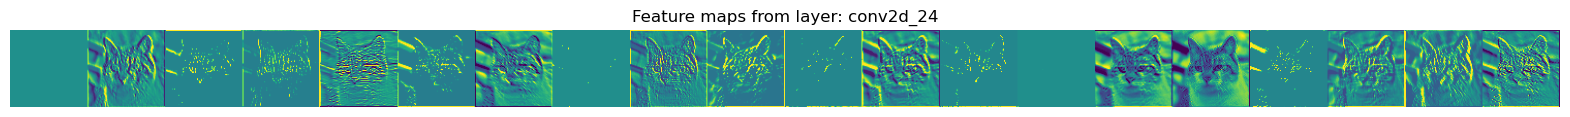

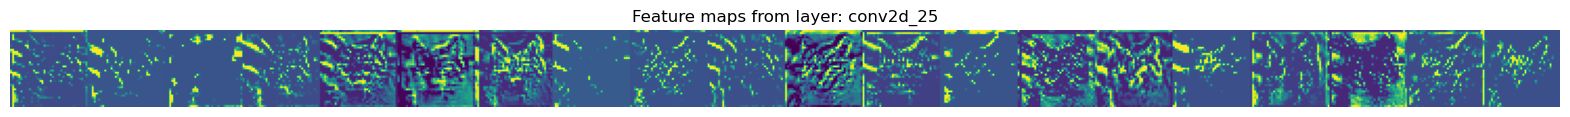

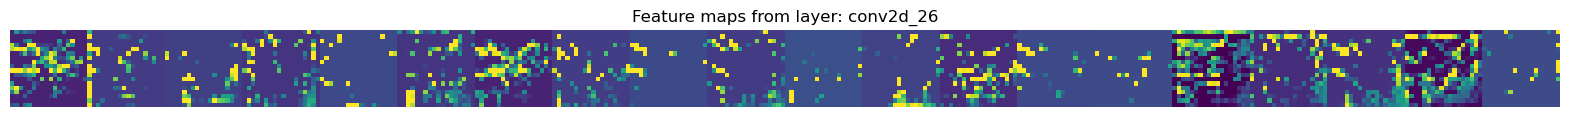

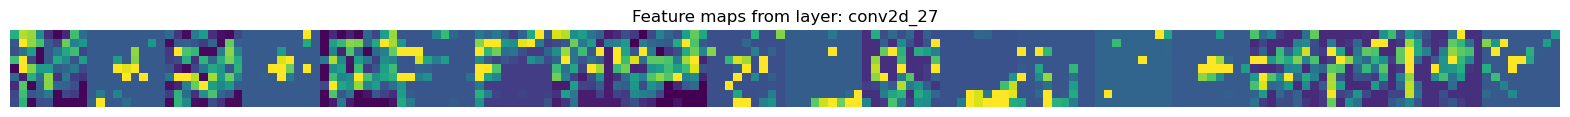

In [88]:
# Välj en katt-bild från testmängden
sample_img = X_train[0]

# Visualisera aktiveringar
visualize_feature_maps(model, sample_img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


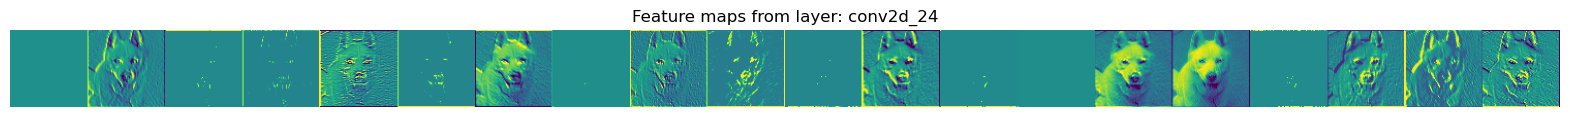

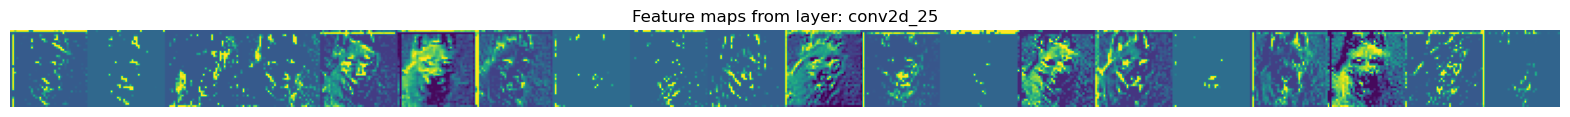

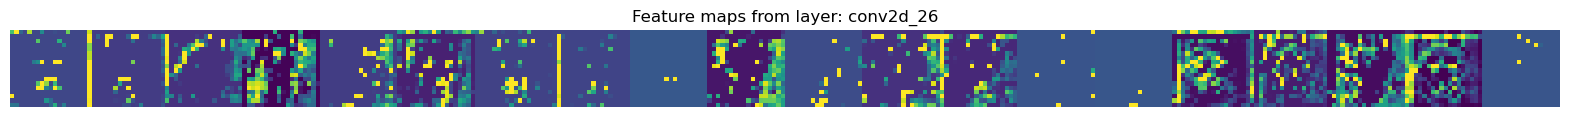

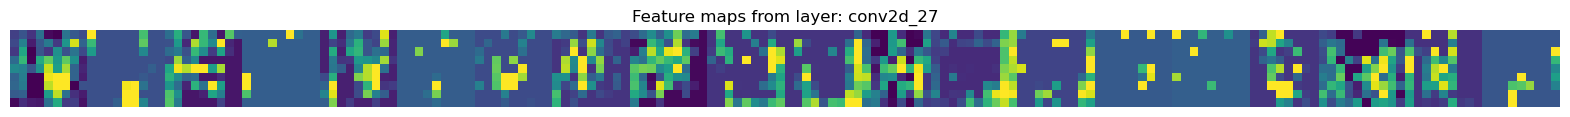

In [90]:
# Välj en hund-bild från testmängden
sample_img = X_train[1]

# Visualisera aktiveringar
visualize_feature_maps(model, sample_img)

In [76]:
# Stepp 10 - Testa modellen / Evaluate


train_loss, train_acc = model.evaluate(X_train, y_train)
print("\nTrainAccuracy: ", train_acc, "\n TrainLoss: ", train_loss)

test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nTestAccuracy: ", test_acc, "\n TestLoss: ", test_loss)


241/241 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - accuracy: 0.9949 - loss: 0.0203

TrainAccuracy:  0.9781818389892578 
 TrainLoss:  0.06615301221609116
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.8771 - loss: 0.4091

TestAccuracy:  0.8534091114997864 
 TestLoss:  0.452749103307724


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


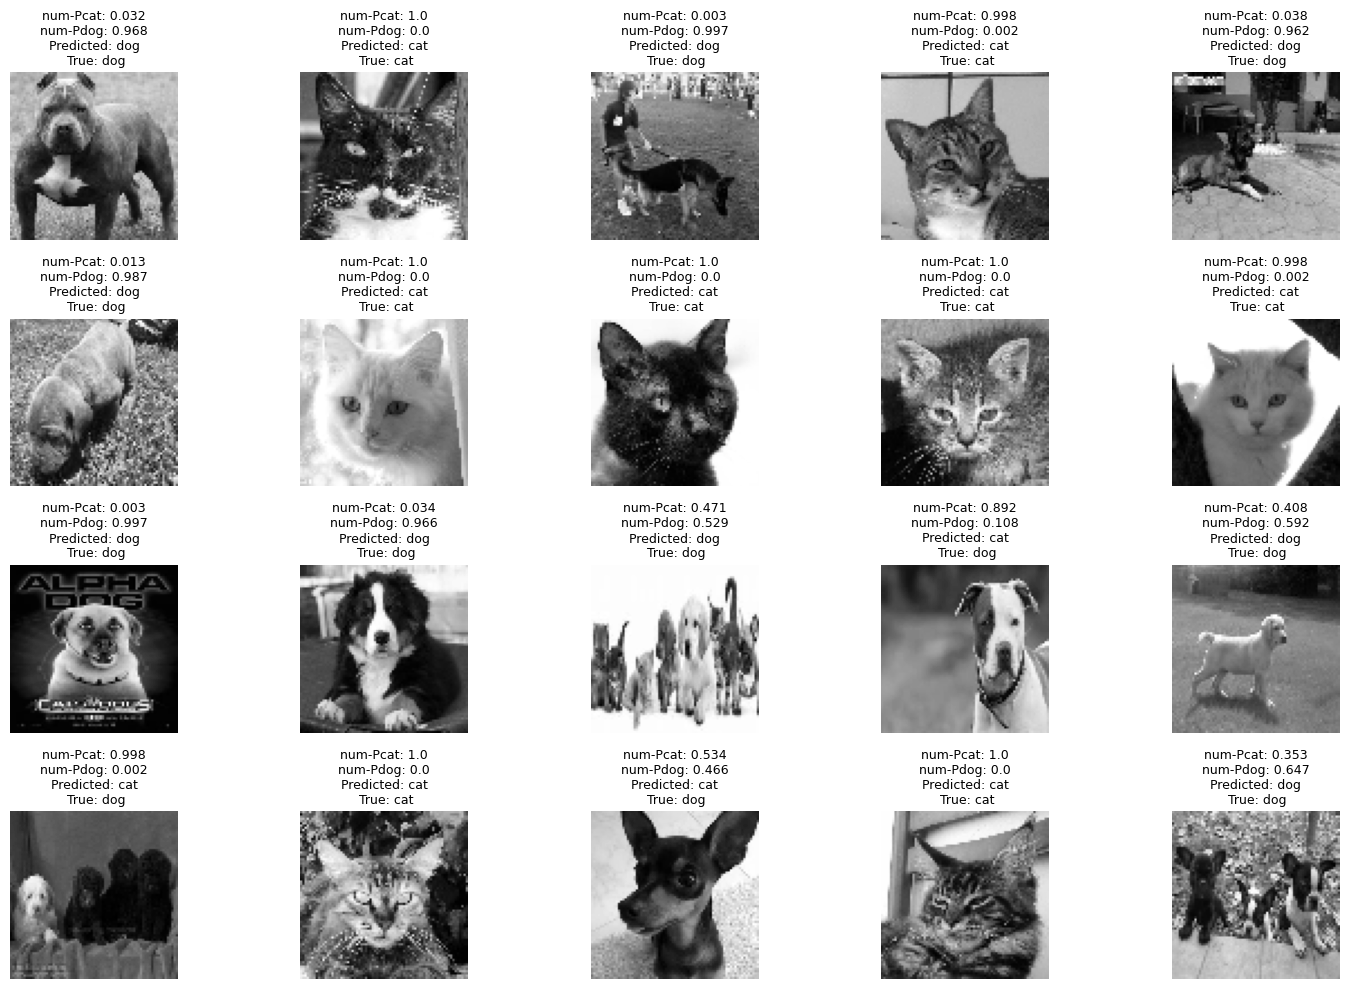

In [86]:

# Stepp 11 - Prediktera (Förutsäga) bild
predictions = model.predict(X_test)
class_names = ['cat', 'dog']

plt.figure(figsize=(15,10))
for i in range(20):
    plt.subplot(4, 5, i+1)
    #plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.imshow(X_test[i], cmap=plt.cm.grey)
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[y_test[i][0]]
    num_P_cat = round(1000*predictions[i][0])/1000   # Numerisk sannorlikhet för Katt
    num_P_dog = round(1000*predictions[i][1])/1000   # Numerisk sannorlikhet för Hund
    plt.title(f"num-Pcat: {num_P_cat}\nnum-Pdog: {num_P_dog}\nPredicted: {predicted_label}\n True: {true_label}", fontsize=9)
    plt.axis("off")
plt.tight_layout()
plt.show()



In [12]:
y_test[2][0]

1

In [13]:
print(f"{ predictions[0] = }\n { predictions[0][0] = }\n { predictions[0][1] = }")

 predictions[0] = array([0.01045556, 0.98954445], dtype=float32)
  predictions[0][0] = 0.010455561
  predictions[0][1] = 0.98954445
